In [6]:
import numpy as np
from change_point_detector.density_ratio_estimator import DRChangeRateEstimator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from change_point_detector.test_dataset import TestDataSet
dataset = TestDataSet()

In [3]:
detector = DRChangeRateEstimator(sliding_window=3,
                                                               pside_len=3,
                                                               cside_len=3,
                                                               mergin=0,
                                                               trow_offset=0,
                                                               tcol_offset=0)
detector.build(estimation_method="von_mises_fisher",
                          options=detector.MEAN_OPTION)

In [4]:
# load data
widths=[20, 20, 20, 20, 20]
# gradients=[1., 3., -2.]
means=[1.0, -2.0, 3.0, -4.0, 5.0]
variances=[0.5, 0.5, 0.5, 0.5, 0.5]
data_y = dataset.get_step_series(widths, means, variances)
data_x = np.arange(sum(widths), dtype=float)
data = {"x": data_x, "y": data_y}

#  calculate change rate
change_rates = detector.transform(data["y"])

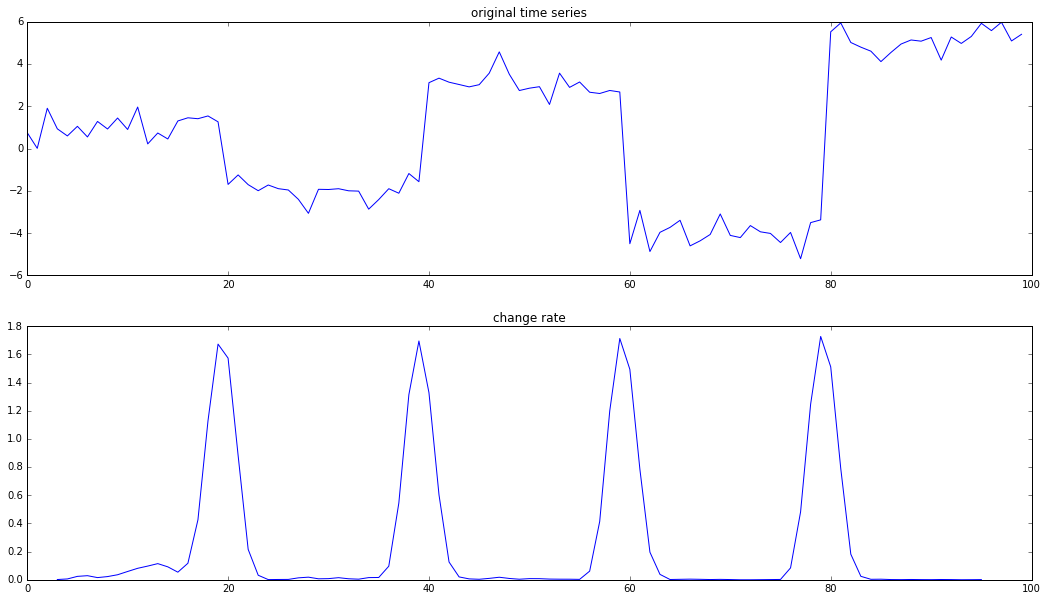

In [7]:
figs = plt.figure(figsize=(18, 10))
subfig1 = figs.add_subplot(2, 1, 1)
subfig1.plot(data["x"], data["y"])
subfig1.set_title("original time series")
subfig2 = figs.add_subplot(2, 1, 2)
subfig2.plot(data["x"], change_rates)
subfig2.set_title("change rate")